In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('e_jet')
    scalar.append('phi_jet')
    scalar.append('pt_electron')
    scalar.append('phi_photon')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files = ["$HOME/fjpythia/output/102.root"]
df = getData(files)


Processed $HOME/fjpythia/output/102.root in 0.6 seconds


In [4]:
x = applyCut(df, 'pt_jet < 0.25', 'pt_jet < 0.25')
print min(df['Q2'])

pt_jet < 0.25 0  fraction kept: 0.0
1.00018906593


In [5]:
d = applyCut(df, '0.01 < y < 0.85', 'y')
d = applyCut(d, 'W2 > 4', 'W2')
d = applyCut(d, 'pt_jet > 4', 'pt_jet')
d = applyCut(d, 'pt_electron > 4', 'pt_electron')
d = fixPhi(d, 'photon')
d = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

y 263661  fraction kept: 66.1
W2 263661  fraction kept: 100.0
pt_jet 12202  fraction kept: 4.6
pt_electron 4765  fraction kept: 39.1
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 2379  fraction kept: 49.9


(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 8 Text yticklabel objects>)

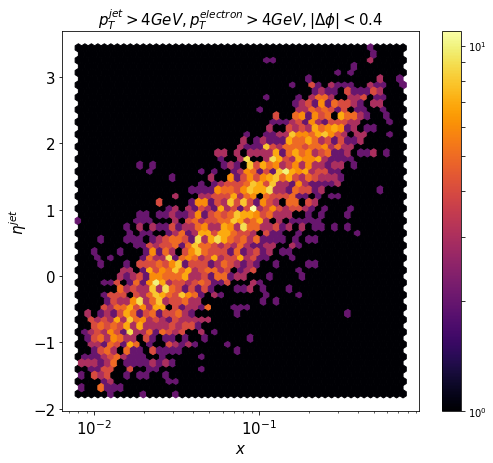

In [6]:
fig = plt.figure(figsize=(8,7))
plot2d(d, 'x', 'eta_jet', '$x$', '$ \eta^{jet} $', 'p_T^{jet} > 4 GeV, p_T^{electron} > 4 GeV, |\Delta \phi| < 0.4',\
       'eta_jet_vs_x')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)